In [1]:
import numpy as np
import pandas as pd
import exomerge

In [22]:
model = exomerge.import_model('2019.06.12_PTM2_out.e', timesteps='last', node_field_names='all')

In [23]:
print model.summarize()

The model contains the following:
  137500 elements
  1 timesteps
  0 global variables
  145656 nodes
  6 node fields
  2 element blocks
  6 element fields
  6 node sets
  0 node set fields
  6 side sets
  0 side set fields
None


In [36]:
 print model.get_node_field_names()

['depth', 'disp_i', 'disp_j', 'disp_k', 'pressure', 'stress_ii', 'stress_jj', 'stress_kk', 'temp_C', 'temperature', 'total_stress_ii', 'total_stress_jj', 'total_stress_kk', 'x_i', 'y_i', 'z_i']


In [25]:
model.calculate_node_field('temp_C = temperature-273.15')

In [26]:
print model.get_element_field_names()

['stress_ii', 'stress_ij', 'stress_ik', 'stress_jj', 'stress_jk', 'stress_kk']


In [27]:
model.convert_element_field_to_node_field('stress_ii')

In [28]:
model.convert_element_field_to_node_field('stress_jj')

In [29]:
model.convert_element_field_to_node_field('stress_kk')

In [30]:
model.calculate_node_field('total_stress_ii = stress_ii * -1 + 0.6 * pressure')

In [31]:
model.calculate_node_field('total_stress_jj = stress_jj * (-1) + 0.6 * pressure')

In [32]:
model.calculate_node_field('total_stress_kk = stress_kk * (-1) + 0.6 * pressure')

In [33]:
model.calculate_node_field('x_i = X')

In [34]:
model.calculate_node_field('y_i = Y')

In [35]:
model.calculate_node_field('z_i = Z')

In [37]:
model.export_model('2019.06.12_PTM2_out_exomerge.e')

In [38]:
model = exomerge.import_model('2019.06.12_PTM2_out_exomerge.e', timesteps='last', node_field_names='all')

In [40]:
x = model.get_node_field_values('x_i')

In [41]:
y = model.get_node_field_values('y_i')

In [42]:
z = model.get_node_field_values('z_i')

In [43]:
temperature_C = model.get_node_field_values('temp_C')

In [44]:
pressure = model.get_node_field_values('pressure')

In [45]:
sigma_V = model.get_node_field_values('total_stress_kk')

In [46]:
h_max = model.get_node_field_values('total_stress_jj')

In [47]:
h_min = model.get_node_field_values('total_stress_ii')

In [48]:
data = np.column_stack([x, y, z, temperature_C, pressure, sigma_V, h_max, h_min])

In [49]:
print data.shape

(145656, 8)


In [50]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ImportError: Failed to import any qt binding

In [100]:
np.unique(data[:,2])

array([-1500., -1450., -1400., -1350., -1300., -1250., -1200., -1150.,
       -1100., -1050., -1000.,  -950.,  -900.,  -850.,  -800.,  -750.,
        -700.,  -650.,  -600.,  -550.,  -500.,  -450.,  -400.,  -350.,
        -300.,  -250.,  -200.,  -150.,  -100.,   -50.,     0.,    50.,
         100.,   150.,   200.,   250.,   300.,   350.,   400.,   450.,
         500.,   550.,   600.,   650.,   700.,   750.,   800.,   850.,
         900.,   950.,  1000.,  1050.,  1100.,  1150.,  1200.,  1250.])

In [51]:
np.savetxt('2019.06.12_PTM2_out_exomerge.csv',data , delimiter=",")

In [43]:
data_neg450 = data[data[:,2] == -450] # select rows where first column is greater than 3

In [44]:
print len(data_neg450)

2601


In [45]:
x = data_neg450[:,0]

In [46]:
y = data_neg450[:,1]

In [47]:
X, Y = np.meshgrid(x, y)

In [48]:
Z = data_neg450[:,5]

In [49]:
print Z

[49785538.00618749 49830313.43984814 49813793.06269423 ...
 51597392.85904666 51495412.32722504 51443670.684407  ]


In [50]:
xi, yi = np.linspace(x.min(), x.max(), 50), np.linspace(y.min(), y.max(), 50)
xi, yi = np.meshgrid(xi, yi)

In [51]:
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.interpolate

In [52]:
zi = scipy.interpolate.griddata((x, y), Z, (xi, yi), method='linear')

In [40]:
plt.style.use('classic')

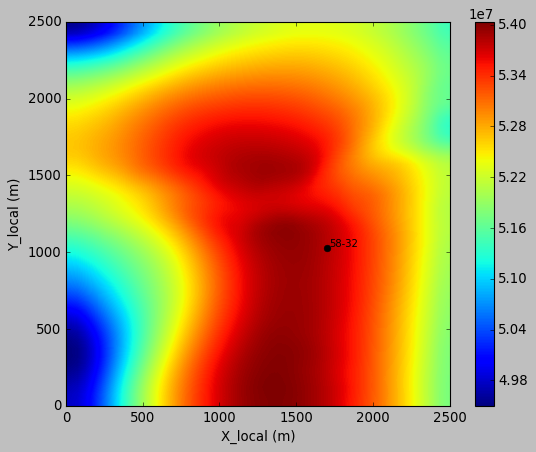

In [53]:
plt.imshow(zi, vmin=Z.min(), vmax=Z.max(), origin='lower',
           extent=[x.min(), x.max(), y.min(), y.max()])
#plt.contour(zi, vmin=Z.min(), vmax=Z.max(), origin='lower',
#           extent=[x.min(), x.max(), y.min(), y.max()])
plt.colorbar()
plt.xlabel('X_local (m)')
plt.ylabel('Y_local (m)')
plt.plot(1700, 1029, 'ko') #this is 58-32
plt.text(1715, 1035, "58-32", fontsize=9)
plt.show()

In [129]:
np.unique(data[:,1])

array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
        450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
        900.,  950., 1000., 1050., 1100., 1150., 1200., 1250., 1300.,
       1350., 1400., 1450., 1500., 1550., 1600., 1650., 1700., 1750.,
       1800., 1850., 1900., 1950., 2000., 2050., 2100., 2150., 2200.,
       2250., 2300., 2350., 2400., 2450., 2500.])

In [74]:
data_h_max = data[data[:,0] == 1700] # slice along h_max

In [75]:
len(data_h_max)

2856

In [76]:
y = data_h_max[:,2]

In [77]:
len(x)


2856

In [78]:
x = data_h_max[:,1]

In [79]:
X, Y = np.meshgrid(x, y)

In [80]:
xi, yi = np.linspace(x.min(), x.max(), 50), np.linspace(y.min(), y.max(), 50)
xi, yi = np.meshgrid(xi, yi)

In [81]:
h_max = data_h_max[:,5]

In [82]:
len(h_max), len(x)


(2856, 2856)

In [83]:
zi = scipy.interpolate.griddata((x, y), h_max , (xi, yi), method='linear')

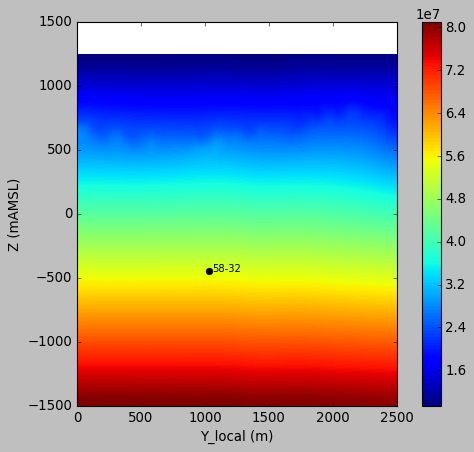

In [84]:
plt.imshow(zi, vmin=h_max.min(), vmax=h_max.max(), origin='lower',
           extent=[x.min(), x.max(), y.min(), y.max()])
#plt.contour(zi, vmin=h_max.min(), vmax=h_max.max(), origin='lower',
#           extent=[x.min(), x.max(), y.min(), y.max()])
plt.colorbar()
plt.xlabel('Y_local (m)')
plt.ylabel('Z (mAMSL)')
plt.plot(1034, -450, 'ko') #this is 58-32
plt.text(1060, -450, "58-32", fontsize=9)
plt.show()

In [209]:
np.unique(data[:,1])

array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
        450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
        900.,  950., 1000., 1050., 1100., 1150., 1200., 1250., 1300.,
       1350., 1400., 1450., 1500., 1550., 1600., 1650., 1700., 1750.,
       1800., 1850., 1900., 1950., 2000., 2050., 2100., 2150., 2200.,
       2250., 2300., 2350., 2400., 2450., 2500.])

In [66]:
data_h_min = data[data[:,1] == 1050] # slice along h_max

In [67]:
y = data_h_max[:,2]
x = data_h_max[:,1]

In [68]:
X, Y = np.meshgrid(x, y)

In [69]:
xi, yi = np.linspace(x.min(), x.max(), 50), np.linspace(y.min(), y.max(), 50)
xi, yi = np.meshgrid(xi, yi)

In [86]:
h_min = data_h_min[:,5]

In [87]:
zi = scipy.interpolate.griddata((x, y), h_min , (xi, yi), method='linear')

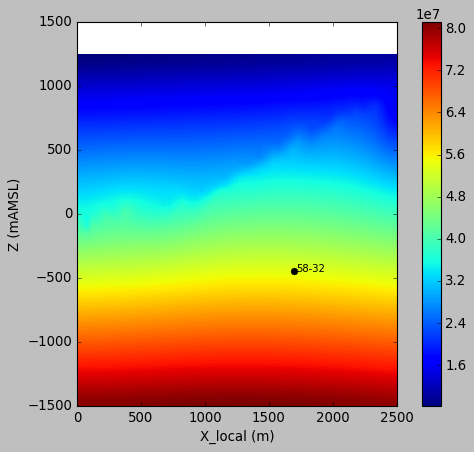

In [88]:
plt.imshow(zi, vmin=h_min.min(), vmax=h_min.max(), origin='lower',
           extent=[x.min(), x.max(), y.min(), y.max()])
#plt.contour(zi, vmin=h_min.min(), vmax=h_min.max(), origin='lower',
#           extent=[x.min(), x.max(), y.min(), y.max()])
plt.colorbar()
plt.xlabel('X_local (m)')
plt.ylabel('Z (mAMSL)')
plt.plot(1700, -450, 'ko') #this is 58-32
plt.text(1715, -450, "58-32", fontsize=9)
plt.show()